Task 1: Create a bar chart or histogram to visualize the distribution of a categorical or continuous variables,such as the distribution of ages or genders in a population.

In [ ]:
import pandas as pd
import requests
from io import BytesIO

# Download the file as binary
url = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2013/DataFiles/DEMO_H.XPT"
resp = requests.get(url)
resp.raise_for_status()

# Read into pandas
df = pd.read_sas(BytesIO(resp.content), format='xport')

# Preview
print(df[['SEQN','RIAGENDR','RIDAGEYR']].head())


      SEQN  RIAGENDR  RIDAGEYR
0  73557.0       1.0      69.0
1  73558.0       1.0      54.0
2  73559.0       1.0      72.0
3  73560.0       1.0       9.0
4  73561.0       2.0      73.0


In [ ]:
df = df.rename(columns={'SEQN': 'ID', 'RIAGENDR': 'Gender', 'RIDAGEYR': 'Age'})
df['Gender'] = df['Gender'].replace({1: 'Male', 2: 'Female'})
print(df[['ID','Gender','Age']].head())


        ID  Gender   Age
0  73557.0    Male  69.0
1  73558.0    Male  54.0
2  73559.0    Male  72.0
3  73560.0    Male   9.0
4  73561.0  Female  73.0


/tmp/ipython-input-7-984211561.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set2")


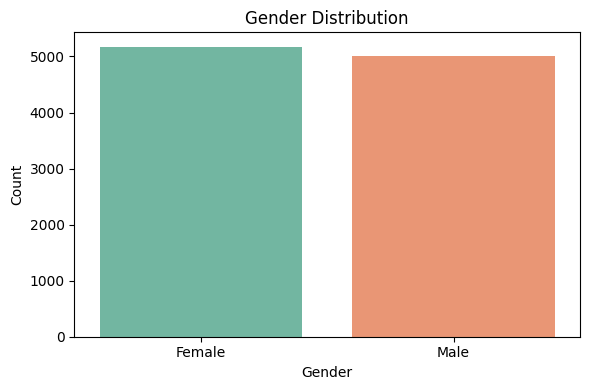

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set2")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

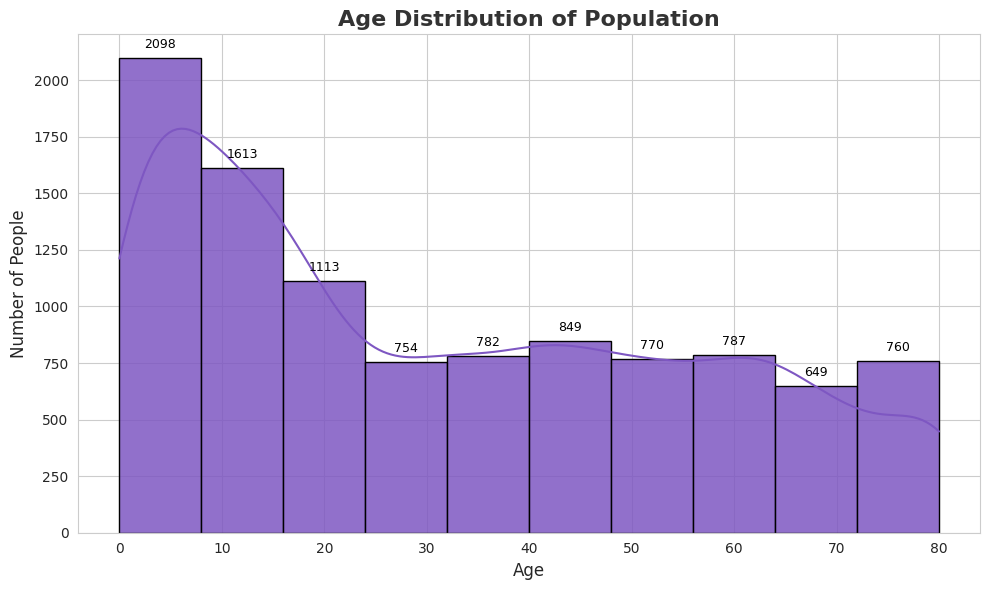

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use whitegrid theme for modern look
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(10, 6))

# Plot histogram with attractive color and outline
hist_plot = sns.histplot(
    df['Age'],
    bins=10,
    kde=True,
    color="#7E57C2",           # Deep purple for bars
    edgecolor="black",
    alpha=0.85,
    kde_kws={}  # Removed the 'linewidth' argument
)

# Titles and labels
plt.title("Age Distribution of Population", fontsize=16, fontweight='bold', color="#333333")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of People", fontsize=12)

# Ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add count labels on bars
for p in hist_plot.patches:
    height = p.get_height()
    if height > 0:
        hist_plot.annotate(f'{int(height)}',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='bottom',
                           fontsize=9, color='black',
                           xytext=(0, 5),
                           textcoords='offset points')

plt.tight_layout()
plt.show()